### Evaluación de métricas y variables de los modelos lineales

In [1]:
import sys
sys.path.append("../../") # go to parent dir

In [2]:
from modelos import *
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import calplot
from pandas import DatetimeIndex

In [3]:
pd.options.display.max_columns = 50 # para mostrar todas las columnas

#### Cargamos los datos de las metricas de MLFlow para evaluar los modelos

In [4]:
runs = pd.read_csv('runs/runs-lineal.csv')
runs.head()

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,C,alpha,l1_ratio,loss,max_iter,random_state,selection,solver,CV_TEST_RMSE,CV_TRAIN_RMSE,RANDOM SEED,TEST_MAX_ERROR,TEST_MEAN_ABS_ERROR,TEST_MEDIAN_ABS_ERROR,TEST_ROOT_MEAN_SQ_ERROR,Training Info
0,2024-04-27 20:06:05,2.2s,b2d39d5bdc3a457399c425ef70152e1b,escalado-ELASTIC_random_search,LOCAL,/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/py...,tyomikjan,FINISHED,NaN,0.01,0.15,NaN,1000.0,777,NaN,NaN,0.450307,0.448914,777,2.535188,0.342054,0.277612,0.444408,Modelo elastic net
1,2024-04-27 20:11:37,2.4s,2231e88727014ff684d0763fcc8a6c8b,MANUAL-selection-ELASTIC_random_search,LOCAL,/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/py...,tyomikjan,FINISHED,NaN,0.01,0.15,NaN,1000.0,777,NaN,NaN,0.453762,0.452350,777,2.524999,0.341155,0.274045,0.444501,Modelo elastic net
2,2024-04-27 20:11:49,2.2s,f2c66fda69be4edcaa7c9f0ee94e75ca,escalado-MANUAL-selection-ELASTIC_random_search,LOCAL,/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/py...,tyomikjan,FINISHED,NaN,0.01,0.15,NaN,1000.0,777,NaN,NaN,0.452830,0.451408,777,2.554659,0.342027,0.276274,0.444891,Modelo elastic net
3,2024-04-27 20:05:53,2.1s,beddc1f0da5644e69e784b0517df0be0,ELASTIC_random_search,LOCAL,/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/py...,tyomikjan,FINISHED,NaN,0.01,0.15,NaN,1000.0,777,NaN,NaN,0.450229,0.448858,777,2.489357,0.342702,0.275668,0.444909,Modelo elastic net
4,2024-04-27 20:11:31,2.8s,14c67578c7fc4c209d2c14f9916bedbc,MANUAL-selection-ELASTIC_grid_search,LOCAL,/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/py...,tyomikjan,FINISHED,NaN,0.01,0.00,NaN,500.0,777,NaN,NaN,0.452834,0.451385,777,2.515708,0.341535,0.274063,0.445267,Modelo elastic net


### RAIZ DE ECM por SUBCONJUNTOS

Pasamos a ver la diferencia entre el error (raiz del error cuadratico medio) de test de validación(CV_TEST_RMSE) con el error de train de validación (CV_TRAIN_RMSE) y el error sobre TEST (TEST_ROOT_MEAN_SQ_ERROR)

Text(0.5, 0, 'metros')

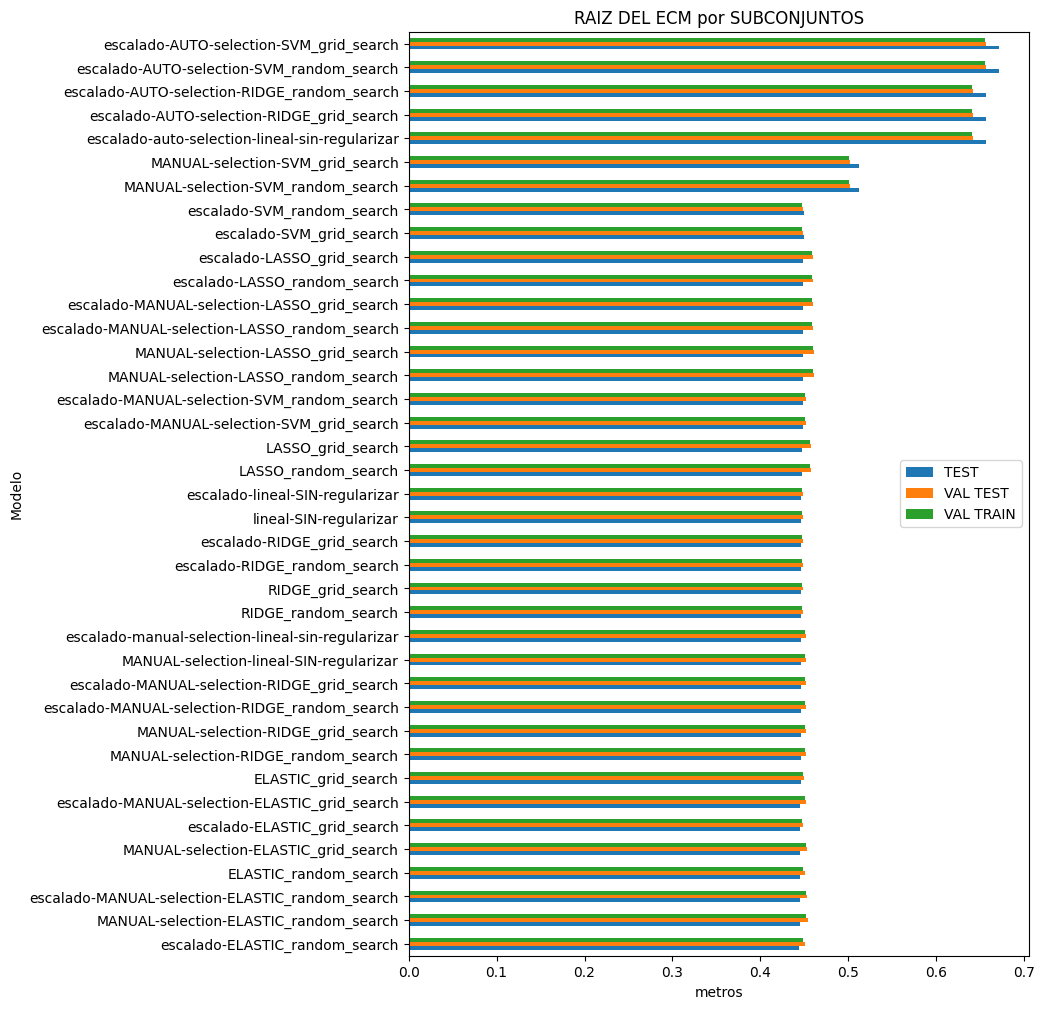

In [5]:
fig, ax = plt.subplots(figsize=(8,12))
runs = runs.sort_values(by='TEST_ROOT_MEAN_SQ_ERROR')

runs.plot(x = 'Name', y = ['TEST_ROOT_MEAN_SQ_ERROR', 'CV_TEST_RMSE', 'CV_TRAIN_RMSE' ], kind = 'barh', ax=ax)
plt.legend(['TEST', 'VAL TEST', 'VAL TRAIN'], loc='center right')
ax.set_title('RAIZ DEL ECM por SUBCONJUNTOS')
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

Viendo esta gráfica podemos apreciar que el error sobre test suele ser más bajo o muy parecido con los errores de validación.

Entre los conjuntos de validación, podemos afirmar que son muy parecidos en todos los modelos

Además, notamos que los peores modelos corresponden a la selección automática de variables, seguramente los vamos a descartar.

### Otras métricas sobre el conjunto TEST

#### Error absoluto medio

Al no usar cuadrados y raices es una métrica más precisa del error

Text(0.5, 0, 'metros')

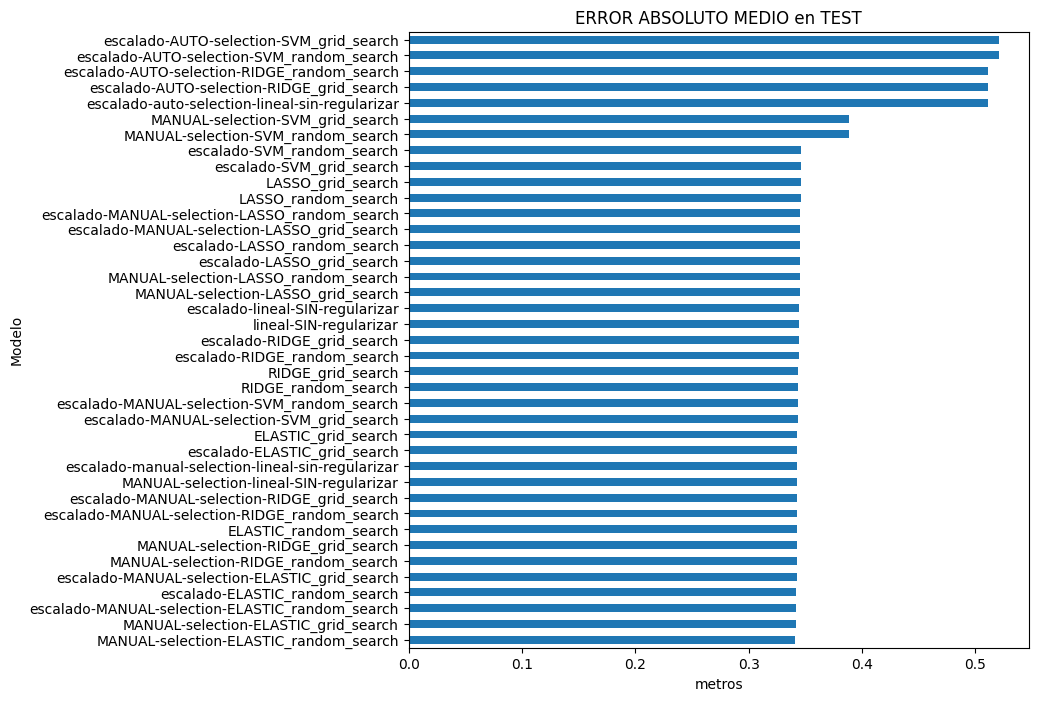

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
runs = runs.sort_values(by='TEST_MEAN_ABS_ERROR')

runs.plot(x = 'Name', y = ['TEST_MEAN_ABS_ERROR'], kind = 'barh', ax=ax)
ax.set_title('ERROR ABSOLUTO MEDIO en TEST')
ax.get_legend().remove()
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

En este caso vemos que varía bastante el rango de este error con respecto a la raiz de ECM, es menor (hasta 0,5 en vez de 0,7 para raiz de ECM)

#### Mediana del error absoluto

En vez de usar la media, usamos la mediana para que no afecten tanto los errores extremos

Text(0.5, 0, 'metros')

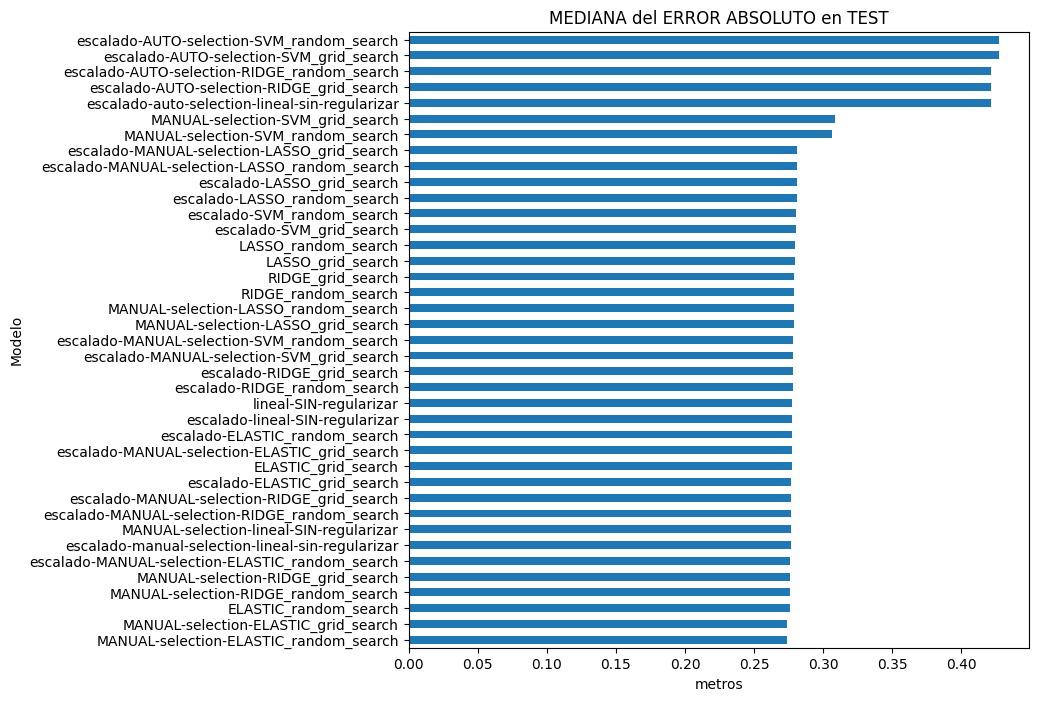

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
runs = runs.sort_values(by='TEST_MEDIAN_ABS_ERROR')

runs.plot(x = 'Name', y = ['TEST_MEDIAN_ABS_ERROR'], kind = 'barh', ax=ax)
ax.set_title('MEDIANA del ERROR ABSOLUTO en TEST')
ax.get_legend().remove()
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

En este caso también el rango baja respecto la anterior gráfica (no llega a 0,5 como en la anterior). Esto es lógico, pues en el anterior gráfico al coger la media se ve afectada por valores más extremos.

#### Error máximo

Métrica importante y nos ayudará a tener en cuenta que modelos pueden funcionar mejor para predecir alturas de olas de todos los rangos

Text(0.5, 0, 'metros')

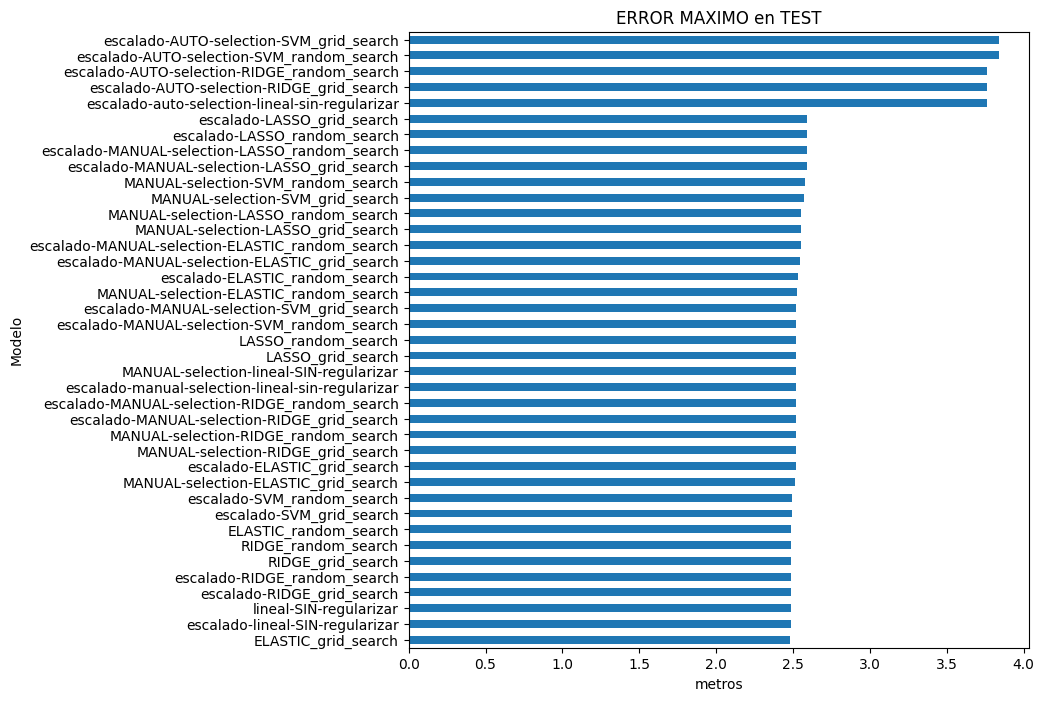

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
runs = runs.sort_values(by='TEST_MAX_ERROR')

runs.plot(x = 'Name', y = ['TEST_MAX_ERROR'], kind = 'barh', ax=ax)
ax.set_title('ERROR MAXIMO en TEST')
ax.get_legend().remove()
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

#### Para comparar mejor los modelos nos vamos a quedar con los 3 mejores modelos de cada métrica y vamos a compararlos netre ellos para todas las métricas anteriores

In [9]:

metrics = ['TEST_ROOT_MEAN_SQ_ERROR', 'TEST_MEAN_ABS_ERROR', 'TEST_MEDIAN_ABS_ERROR', 'TEST_MAX_ERROR']
titles = ['RAIZ DEL ECM en TEST', 'ERROR ABSOLUTO MEDIO en TEST', 'MEDIANA del ERROR ABSOLUTO en TEST', 'ERROR MAXIMO en TEST']

best_models = set() # para que no se repitan
for metric in metrics:
    runs = runs.sort_values(by=metric)
    for name in runs.head(3).Name:
        best_models.add(name)

In [10]:
colors = ['#6CCFF6', '#BFF6FF', '#FF95FD', '#FFF93E', 'green', 'red', '#D17A17', '#D62D2D']
dictCol = dict(zip(best_models, colors))

Seleccionamos solo los runs anteriores en el dataframe y le asignamos los colores para que coincidan en las graficas posteriores

In [11]:
df = runs[runs.Name.isin(best_models)]
df.loc[:, ['color']] = runs.Name.map(dictCol)

Mostramos los gráficos para comparar todas las métricas en escala logarítmica (explicada más abajo esta decisión)

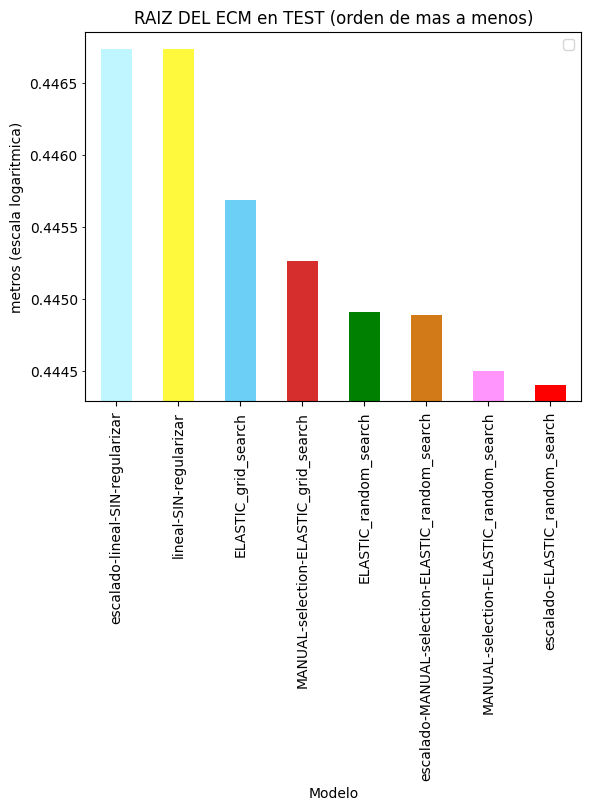

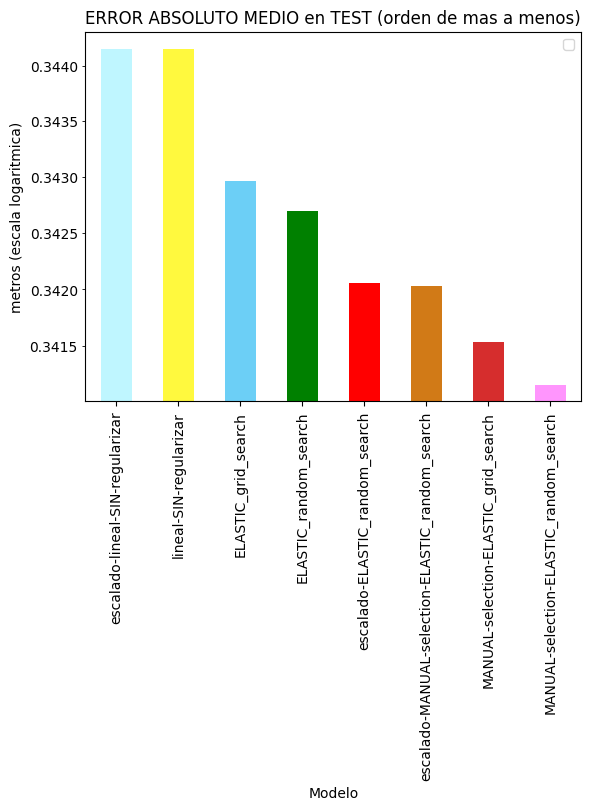

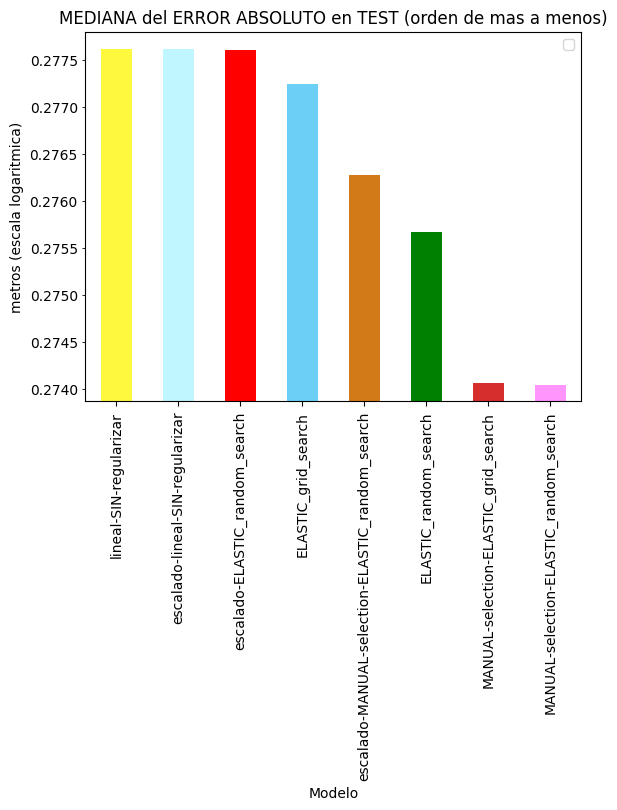

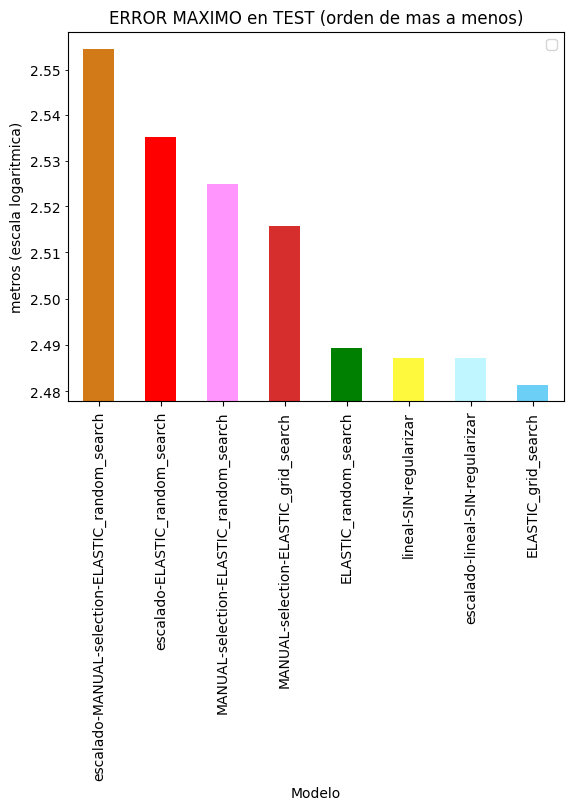

In [12]:
for title, metric in zip(titles, metrics):
    fig,ax = plt.subplots()
    df = df.sort_values(by=metric, ascending=False) # ordenamos por nombre para que aparezcan en el mismo orden
    
    
    df.plot(x = 'Name', y = metric, kind='bar', color=df.color, ax=ax)
    ax.legend([])
    ax.set_title(title + " (orden de mas a menos)")
    ax.set_ylabel('metros (escala logaritmica)')
    ax.set_xlabel('Modelo')
    # escala logaritmica
    ax.set_yscale('log')
    ax.yaxis.set_minor_formatter(ScalarFormatter())

Vemos que los primeros tres gráficos no muestran diferencias mayores de 1 centimetro entre dos modelos. En la comparación del error máximo la diferencia puede llegar a unos 7 cm, pero aún así no es realmente muy importante. Por ello seguramente el modelo que seleccionemos sea el elastic con selecion manual encontrado con random search (color marron). Pues este modelo tiene menos variables que el modelo con todas las variables y la diferencia en el error maximo no es muy alta.

Hemos aplicado escala logarítmica para apreciar mejor la diferencia, pues si lo pintamos con escala lineal sale asi:

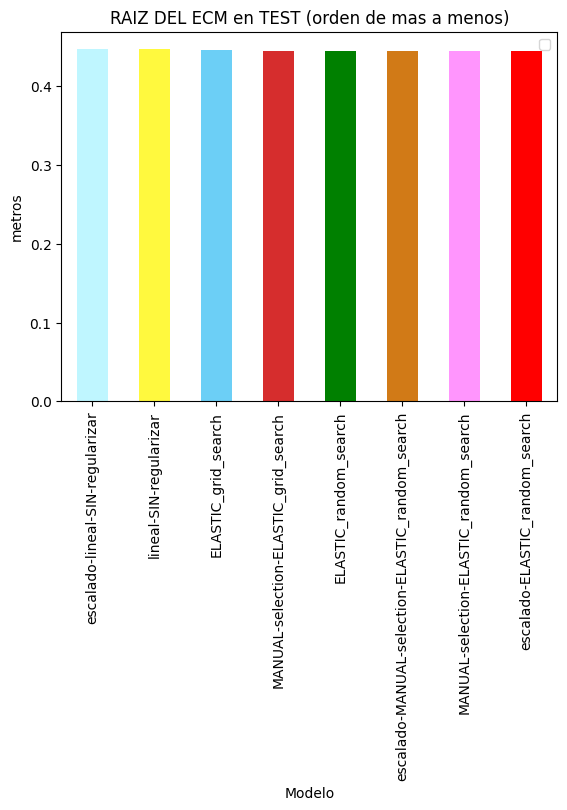

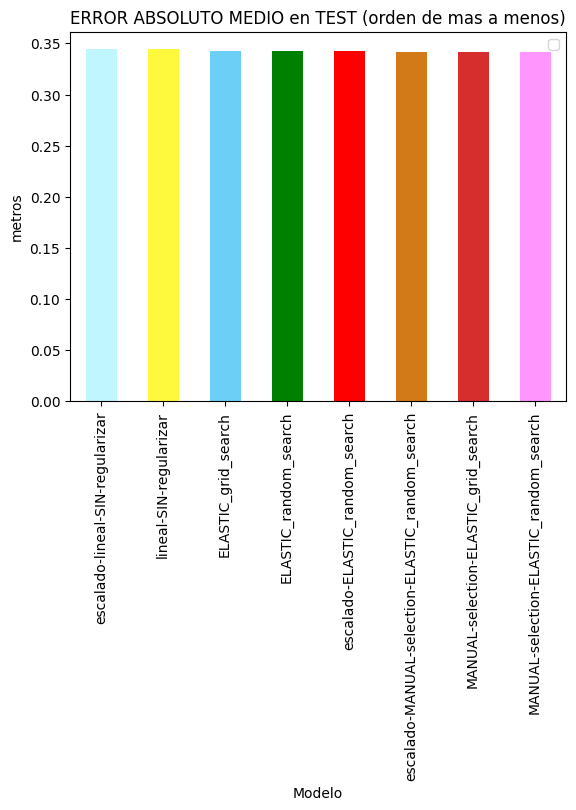

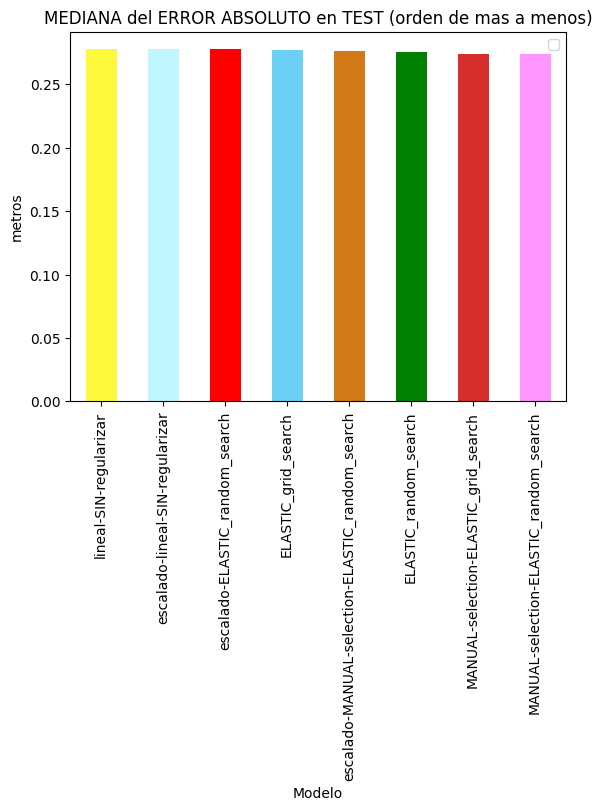

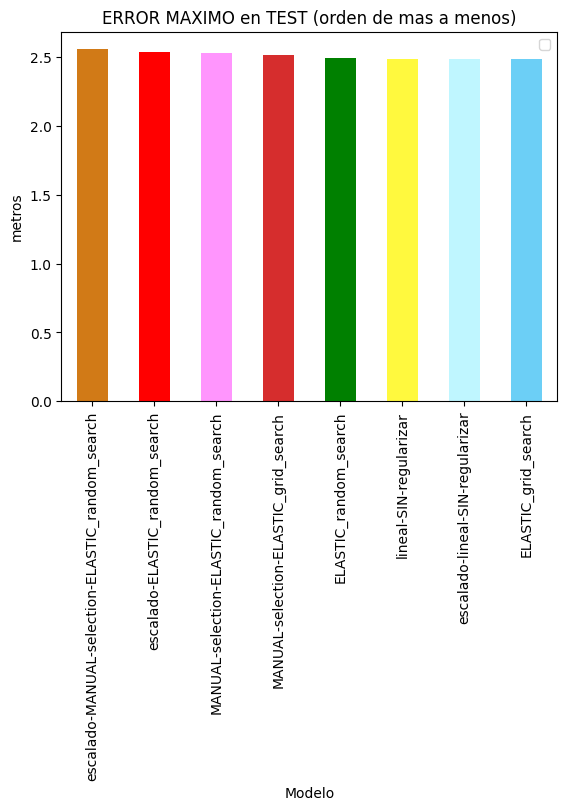

In [13]:
for title, metric in zip(titles, metrics):
    fig,ax = plt.subplots()
    df = df.sort_values(by=metric, ascending=False) # ordenamos por nombre para que aparezcan en el mismo orden
    
    
    df.plot(x = 'Name', y = metric, kind='bar', color=df.color, ax=ax)
    ax.legend([])
    ax.set_title(title + " (orden de mas a menos)")
    ax.set_ylabel('metros')
    ax.set_xlabel('Modelo')

### Análisis de gráficas de dispersión (Y_true vs Y_predicted) por segmentos (Alturas de olas)

In [14]:
# Para el modelo con todas las variables
X_train, X_test, y_train, y_test = sep_train_test()

##### Separamos las olas en 4 grupos por rangos de altura:

In [15]:
def class_ola(ola):
    if (ola < 1):
        return "x<1"
    if (ola < 2):
        return "1<x<2"
    if (ola < 3):
        return "2<x<3"
    else:
        return "x>3"

<Axes: title={'center': 'Segmentación de olas'}>

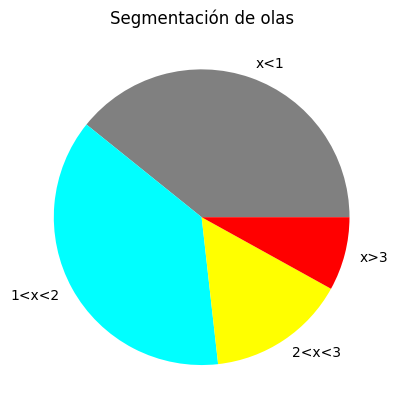

In [16]:
ola_clas = y_test.map(class_ola)
ola_clas.value_counts().plot(kind='pie', label='', title='Segmentación de olas', colors=['gray', "aqua", "yellow", "red"])

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# Regresion lineal sin regularización
x_tr, x_te, y_tr, y_te = X_train, X_test, y_train, y_test
#flo = MLFlow("lineal_sin_reg")
lr = LinearRegression()
# Para probar con datos escalados
scaler = ColumnTransformer(
    transformers=[
        # no escalonamos las dummy de dirección de viento
        ("num", StandardScaler(), [c for c in X_train.columns if not c.startswith('wdir_')]),
    ],
    remainder='passthrough'
)
scaler.fit(X_train)
cv_metrics = cross_validate(lr, scaler.transform(x_tr), y_tr, cv=cv_folds(), scoring="neg_root_mean_squared_error", return_train_score=True)
lr.fit(scaler.transform(x_tr), y_tr)

# metricas TEST
metricas = calcular_metricas(y_te, lr.predict(scaler.transform(x_te)))
metricas

{'TEST_MAX_ERROR': 2.4044657475646467,
 'TEST_ROOT_MEAN_SQ_ERROR': 0.47743018757705213,
 'TEST_MEDIAN_ABS_ERROR': 0.29847791626847553,
 'TEST_MEAN_ABS_ERROR': 0.36944058879007663}

Funcion auxiliar para poder convertir el dataframe de test en uno lo que tiene que recibir el modelo como input

In [18]:
# Devuelve df_test modificado para que lo acepte el modelo m para hacer predict
def to_model_input(df_train, df_test, m):
    # Eliminamos las columnas repetidas y las columnas temporales (visto en el notebook del analisis)
    input_test = df_test.drop(columns=["Temperatura", 'wspd', 'anio', 'mes', 'dia', 'hora'])
    input_train = df_train.drop(columns=["Temperatura", 'wspd', 'anio', 'mes', 'dia', 'hora'])
    # if "auto" in m: no hay modelos automaticos, su rendimiento es muy bajo
    if "MANUAL" in m: # quitamos columnas
        cols = ['moonphase', 'temp', 'rh', 'pressure',
       'vis', 'uv_index', 'wdir_E', 'wdir_ENE', 'wdir_ESE', 'wdir_N',
       'wdir_NE', 'wdir_NNE', 'wdir_NNW', 'wdir_NW', 'wdir_S', 'wdir_SE',
       'wdir_SSE', 'wdir_SSW', 'wdir_SW', 'wdir_VAR', 'wdir_W', 'wdir_WNW',
       'wdir_WSW', 'Vviento', 'PeriodoOlas', 'Lluvia', 'Nubosidad']
        input_test = input_test[cols]
        input_train = input_train[cols]
    if "escalado" in m: # escalamos datos
        scaler = ColumnTransformer(
            transformers=[
                # no escalonamos las dummy de dirección de viento
                ("num", StandardScaler(), [c for c in input_train.columns if not c.startswith('wdir_')]),
            ],
            remainder='passthrough'
        )
        scaler.fit(input_train)
        input_test = scaler.transform(input_test)
    
    return input_test

In [19]:
'''
for m in best_models:
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))
    fig.suptitle(m)
    flo = MLFlow()
    # cargamos el modelo
    model = flo.get_saved_model(m)
    y_pred = model.predict(to_model_input(X_train, X_test, m))
    olas_err = pd.DataFrame({"ola": ola_clas, "error": y_pred - y_test})
    for i, o in enumerate(['x<1', '1<x<2', '2<x<3', 'x>3']):
        ax = axs[i//2, i%2]
        ax.hist(olas_err[olas_err["ola"] == o].error, density=True)
        ax.set_title(o)
        ax.legend()
        #ax.set_xticks(np.linspace(-3, 5, 9))
        #ax.set_yticks(np.linspace(0, 2, 11))
'''

'\nfor m in best_models:\n    fig, axs = plt.subplots(2, 2, figsize=(6, 6))\n    fig.suptitle(m)\n    flo = MLFlow()\n    # cargamos el modelo\n    model = flo.get_saved_model(m)\n    y_pred = model.predict(to_model_input(X_train, X_test, m))\n    olas_err = pd.DataFrame({"ola": ola_clas, "error": y_pred - y_test})\n    for i, o in enumerate([\'x<1\', \'1<x<2\', \'2<x<3\', \'x>3\']):\n        ax = axs[i//2, i%2]\n        ax.hist(olas_err[olas_err["ola"] == o].error, density=True)\n        ax.set_title(o)\n        ax.legend()\n        #ax.set_xticks(np.linspace(-3, 5, 9))\n        #ax.set_yticks(np.linspace(0, 2, 11))\n'

Asignamos colores a los diferentes rangos para visualizar los segmentos en los graficos de dispersion

In [20]:
def ola_color(ola):
    if (ola < 1):
        return "gray"
    if (ola < 2):
        return "aqua"
    if (ola < 3):
        return "yellow"
    else:
        return "red" 

/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versi

Text(0.5, 0.98, 'Alturas de olas: PREDICTED vs TRUE')

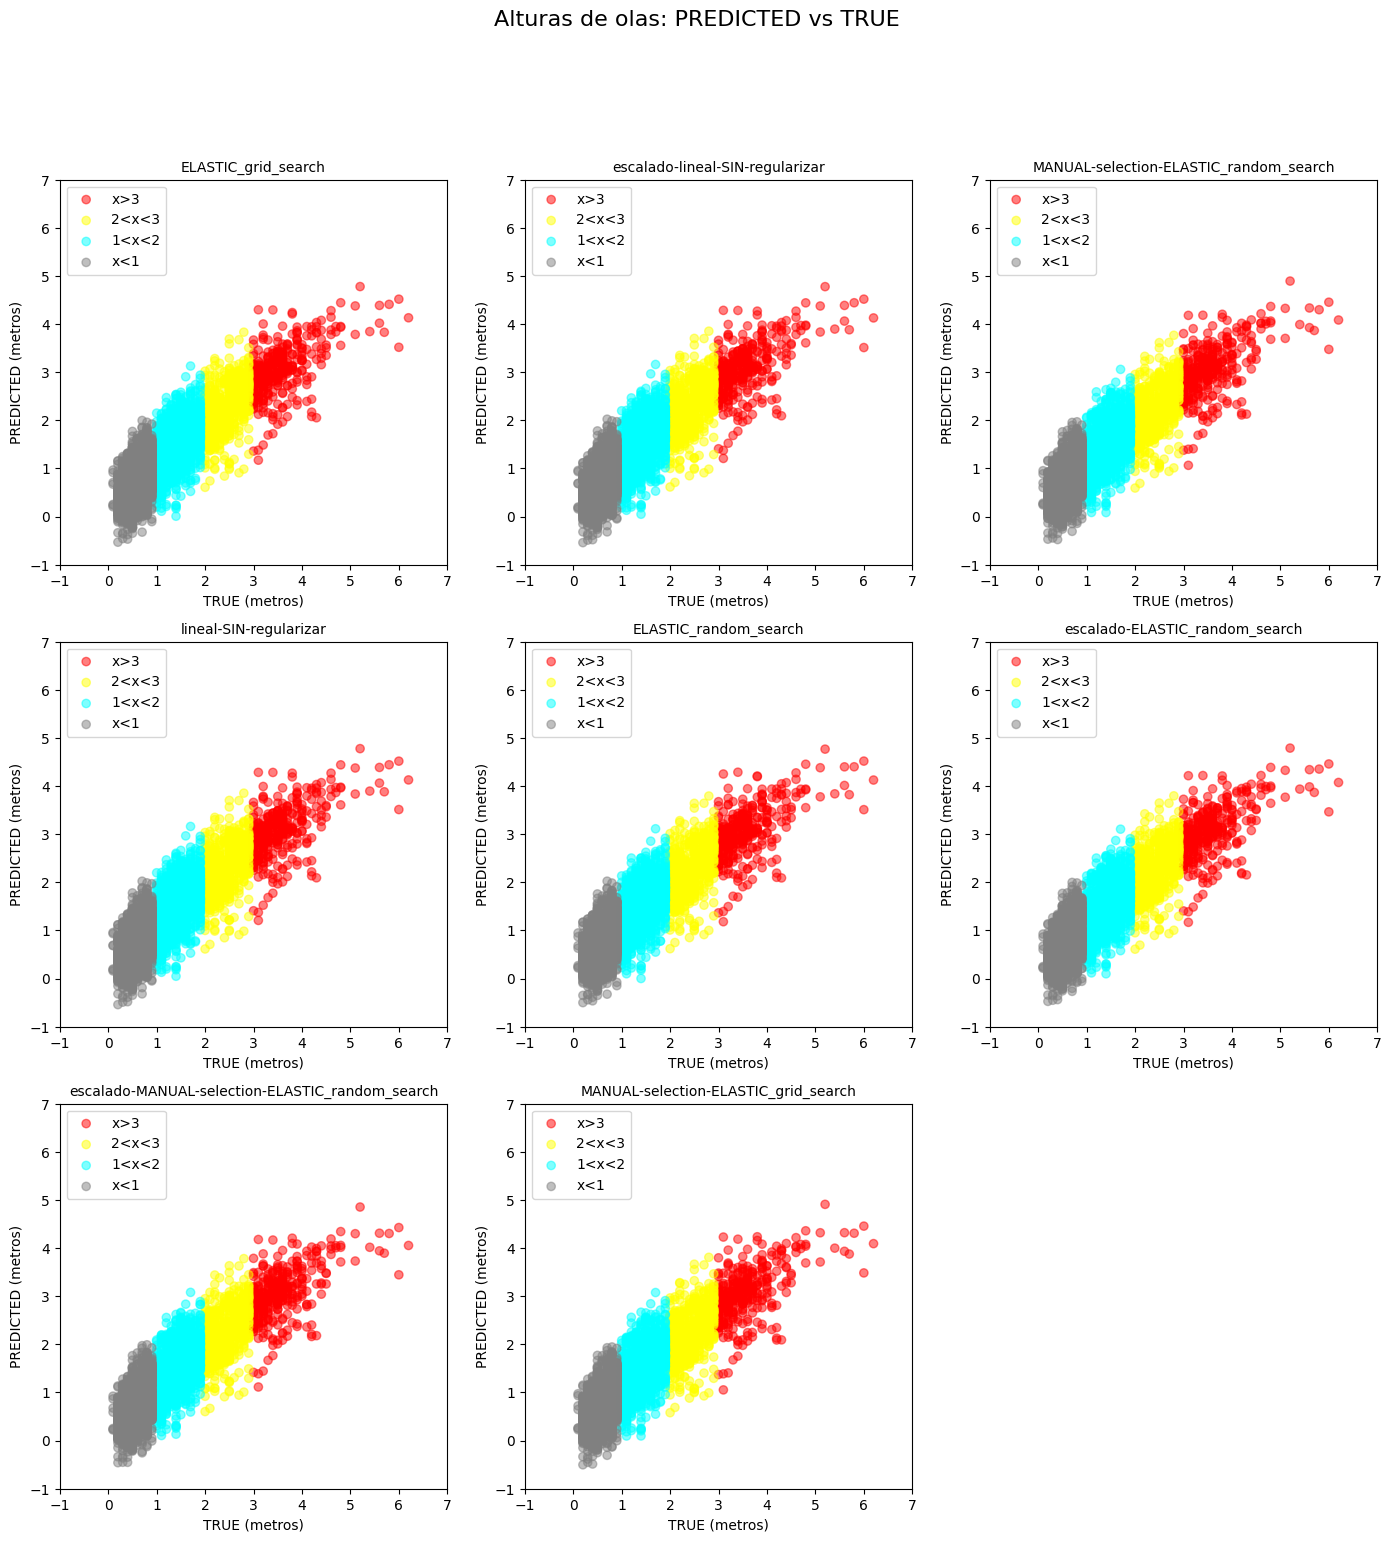

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(17, 17))
for i,m in enumerate(best_models):
    ax = axs[i//3, i%3]
    flo = MLFlow()
    # cargamos el modelo
    model = flo.get_saved_model(m)
    y_pred = model.predict(to_model_input(X_train, X_test, m))
    for cl in ola_clas.unique():
        filter = ola_clas == cl
        ax.scatter(y_test[filter], y_pred[filter], color=y_test[filter].map(ola_color), alpha=0.5)
    ax.legend(["x>3", "2<x<3", "1<x<2", "x<1"], loc='upper left')
    ax.set_xlabel('TRUE (metros)')
    ax.set_ylabel('PREDICTED (metros)')
    ax.set_title(m, fontsize=10)
    ax.set_xticks(np.linspace(-1, 7, 9))
    ax.set_yticks(np.linspace(-1, 7, 9))
axs[2,2].axis('off')
fig.suptitle('Alturas de olas: PREDICTED vs TRUE', fontsize=16)

Vemos que nuestros modelos llegan a predecir olas negativas, lo cual se podria funcionar devolviendo el maximo entre la prediccion y el 0

`return np.maximum(y_pred, 0)`

Además, nunca devuelve una altura de olas superior a 5 metros, además los errores del grupo de olas más altas es el más disperso, lo cual indica que la técnica lineal puede no ser la mejor para resolver este problema a partir de los datos que tenemos

Pero de resto, estos modelos, como en las anteriores evaluaciones, siguen siendo muy parecidos en los gráficos de disperción.

#### Analisis de errores por dias

En esta sección analizaremos los errores viendolos como en un calendario

Primero vemos las distribuciones de olas por dias en nuestro conjunto TEST

Para ello primero definimos una función auxiliar para mostrar los datos en formato calendario

In [22]:
def plot_calendar(X_data, y_data, title, cmap = None, **kwargs):
    # unimos las columnas temporales con la y
    date_height_df = pd.concat([X_data[['anio', 'mes', 'dia', 'hora']].reset_index(drop=True), y_data.reset_index(drop=True)], axis=1)
    # renombramos las columnas para que se pueda convertir a datetimeindex
    date_height_df = date_height_df.rename({'anio': 'year', 'mes': 'month', 'dia': 'day', 'hora': 'hour'}, axis='columns')
    
    date_height_df.set_index(DatetimeIndex(pd.to_datetime(date_height_df[['year', 'month', 'day']])), inplace=True)
    # ya no necesitamos esta informacion, la tenemos en el indice
    date_height_df.drop(columns=['year', 'month', 'day'], inplace=True)
    
    # tenemos que agregar con la media porque son datos por hora y necesitamos los datos por dia
    date_height_df = date_height_df.groupby(date_height_df.index).agg({'AlturaOlas': 'mean'})
    if cmap is None:
        # para los colores https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
        cvals  = [0, 1, 2, 3]
        colors = ['gray', "aqua", "yellow", "red"]
        
        norm=plt.Normalize(min(cvals),max(cvals))
        tuples = list(zip(map(norm,cvals), colors))
        cmap = LinearSegmentedColormap.from_list("", tuples)
    # mostramos el grafico
    calplot.calplot(date_height_df.AlturaOlas,
                    suptitle = title,
                    suptitle_kws = {'x': 0.4, 'y': 1.0, 'fontsize': 16},
                    cmap=cmap,
                    figsize=(15,4),
                    **kwargs)

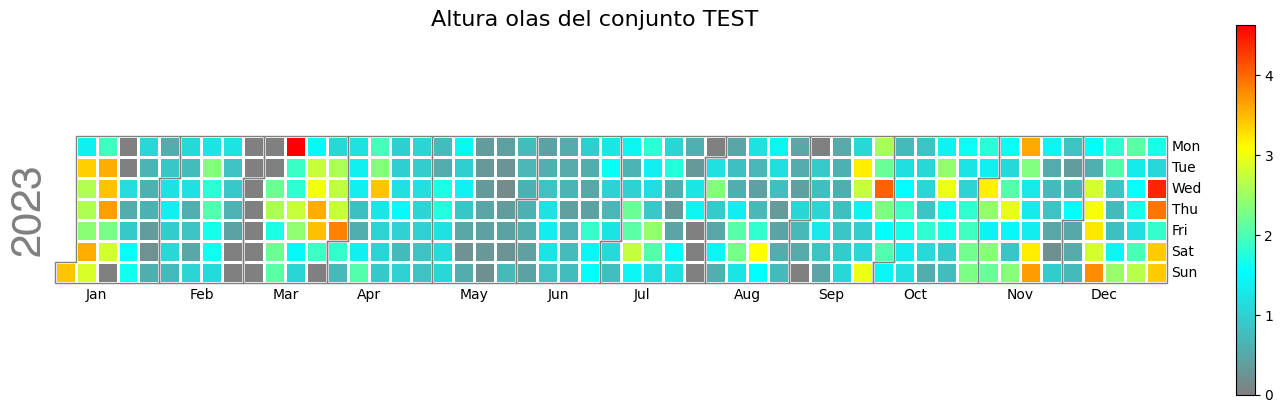

In [23]:
plot_calendar(X_test, y_test, 'Altura olas del conjunto TEST')

Vemos que las olas mayores de 3 metros se concentran principalmente en ENERO, MARZO y DICIEMBRE

#### Ahora pasamos a ver los errores del modelo cometidos en formato de calendario

#### El color azul significa que hemos SOBREESTIMADO la ola (subimos expectativas) y el color rojo que la hemos SUBESTIMADO (supone mayor riesgo al cliente)

##### Primero hacemos las graficas con colores que vayan del minimo al maximo para ver donde estan los mayores errores

/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versi

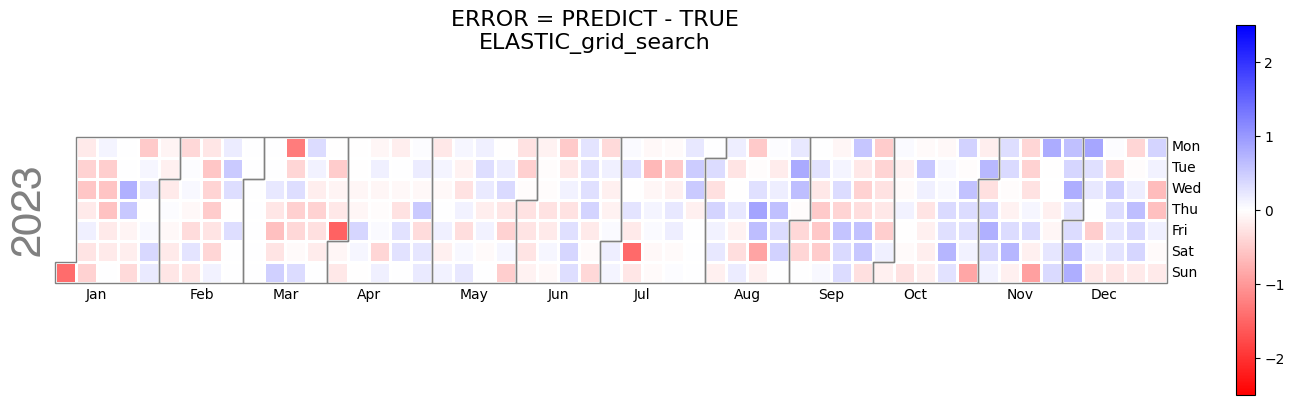

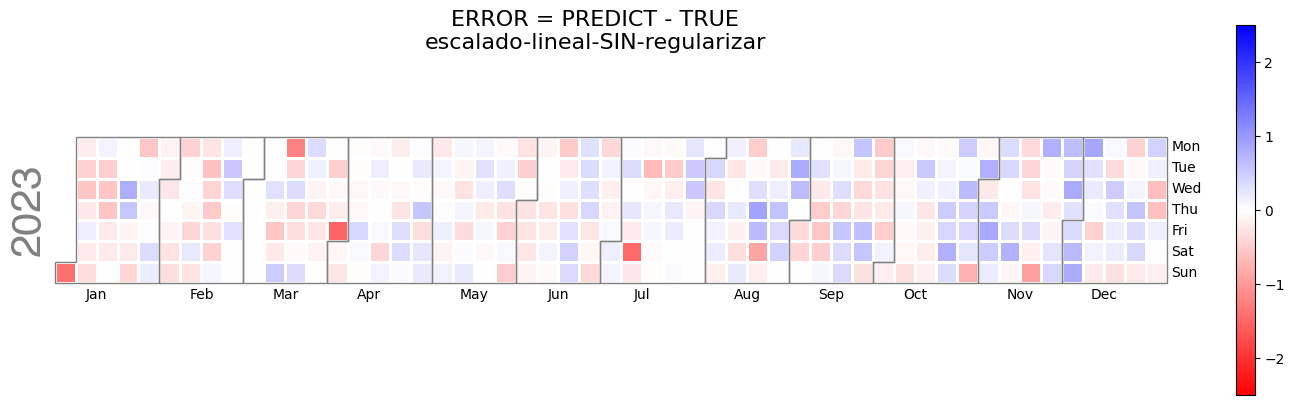

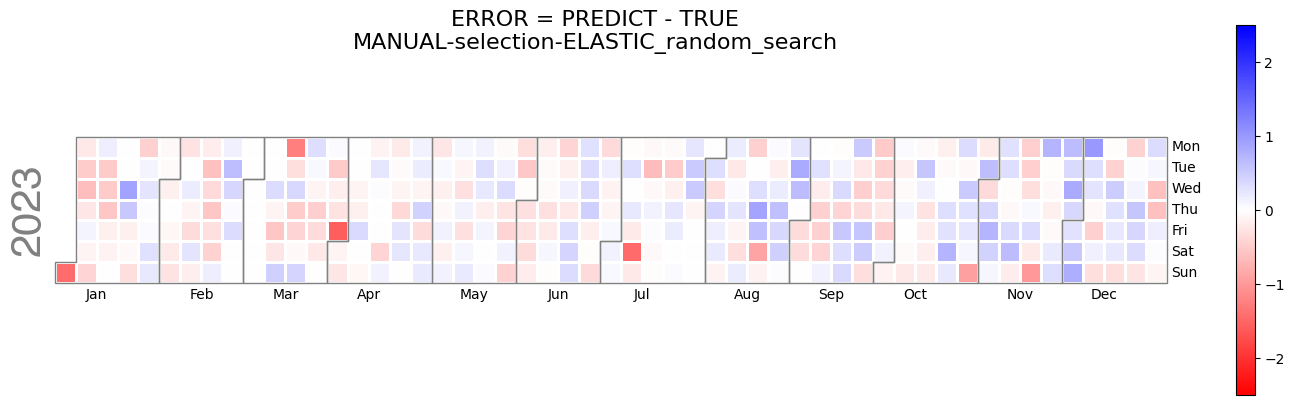

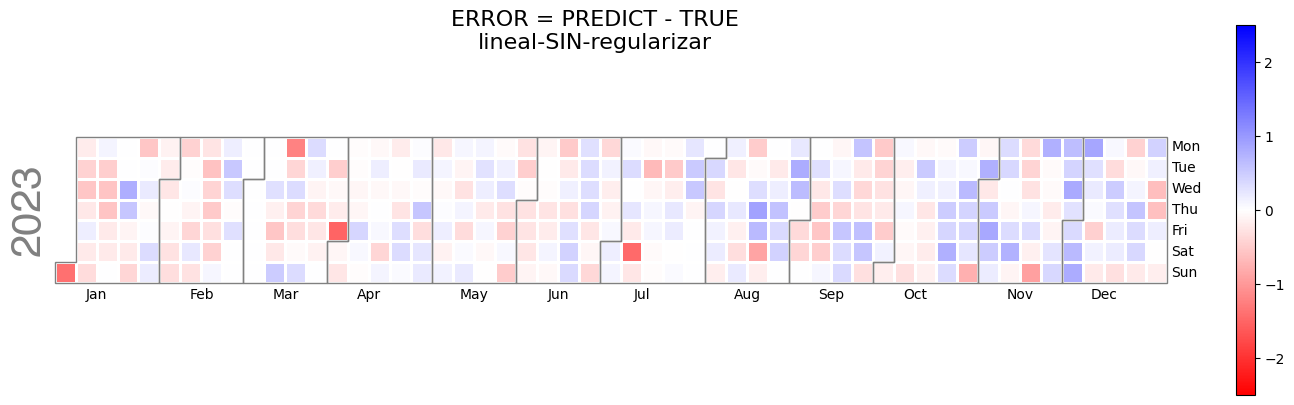

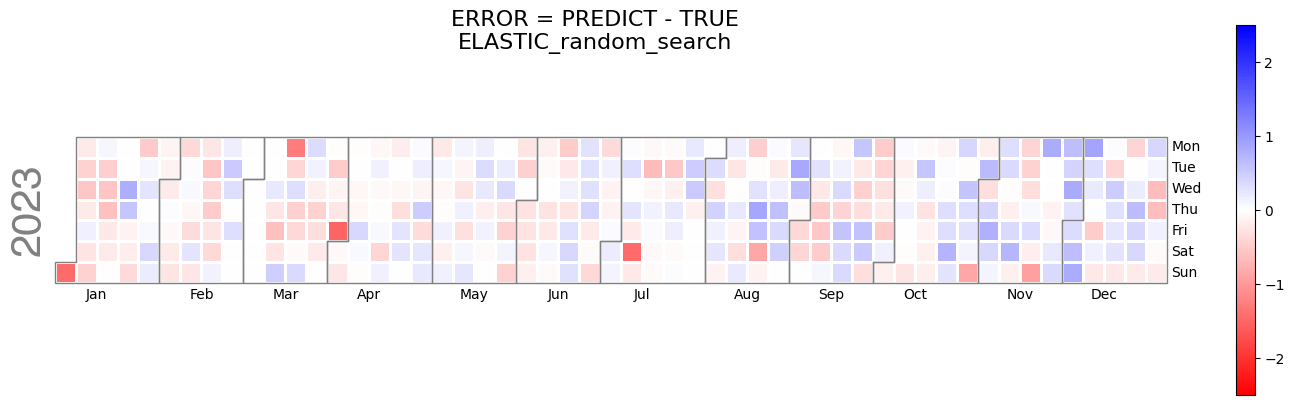

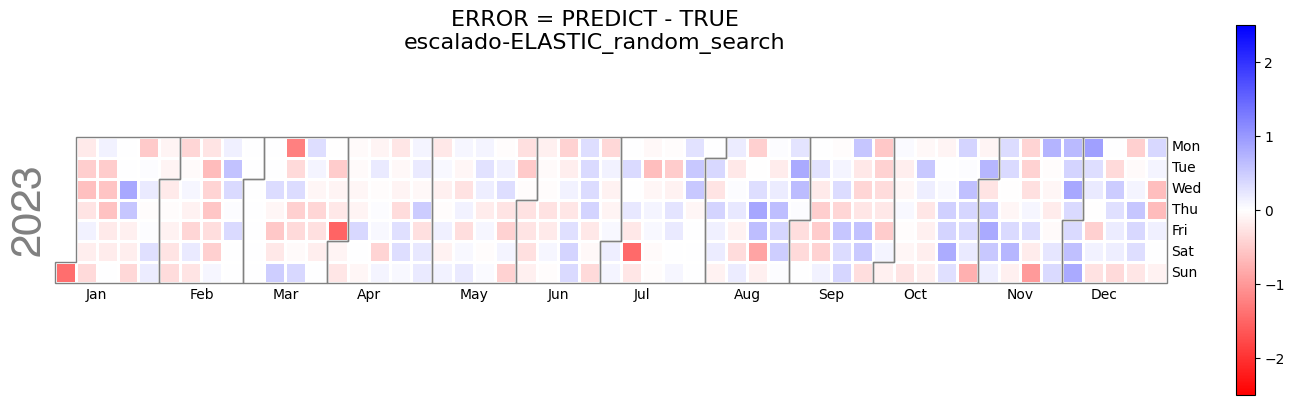

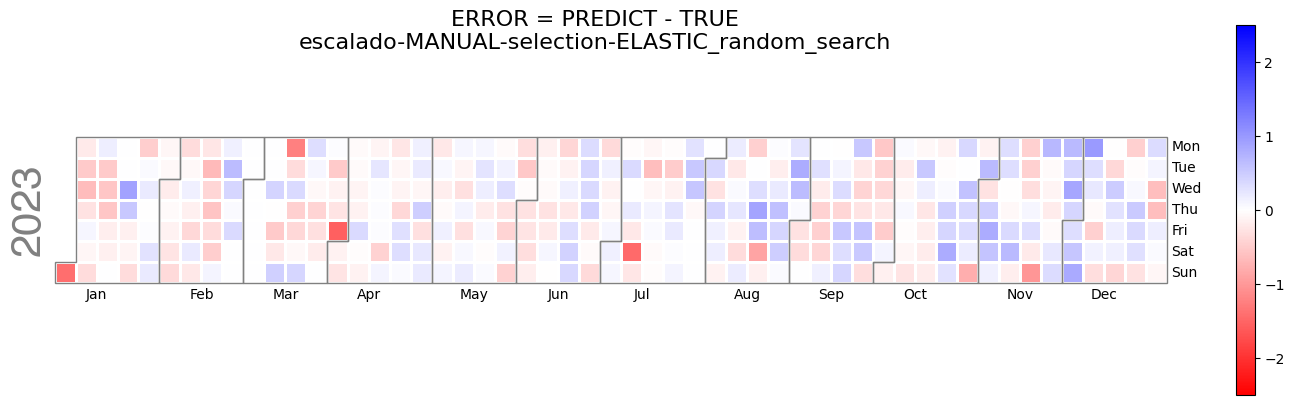

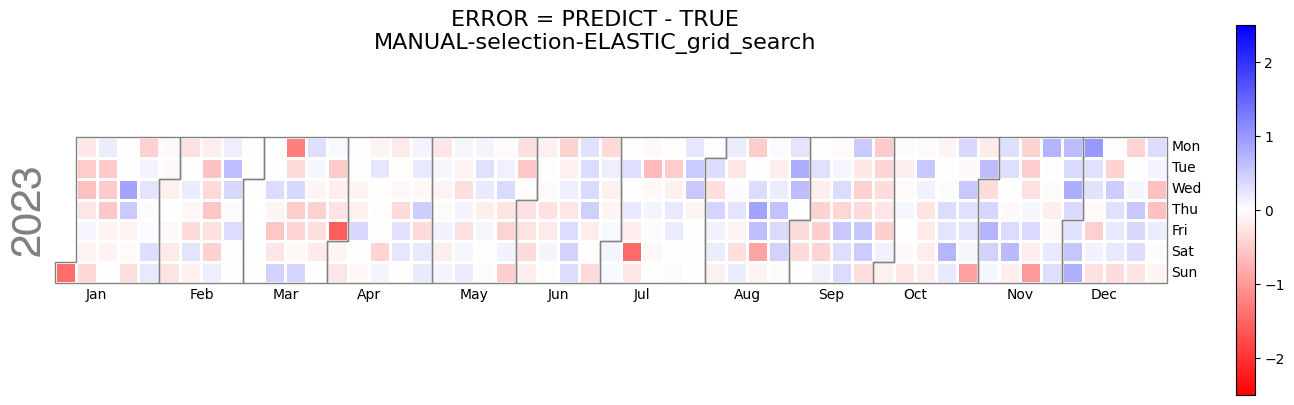

In [29]:

for i,m in enumerate(best_models):
    flo = MLFlow()
    # cargamos el modelo
    model = flo.get_saved_model(m)
    # pasamos numpy a Series
    y_pred = model.predict(to_model_input(X_train, X_test, m))
    
    diff = y_pred - y_test
    # para los colores https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
    cvals  = [-2.5, 0, 2.5]
    colors = ['red', '1', 'blue']
    
    norm=plt.Normalize(min(cvals),max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    plot_calendar(X_test, diff, 'ERROR = PREDICT - TRUE\n' + m, cmap, vmin=-2.5, vmax=2.5)


#### Vemos la presencia de 4 fallos extremos, 1 de ellos se corresponde con una ola grande, otros con olas medianas.

#### Ahora hacemos las graficas para tener una vision con limite de -1.5, 1.5 para que se vea mejor la diferencia entre los errores (los fallos extremos se notarán menos)

/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versi

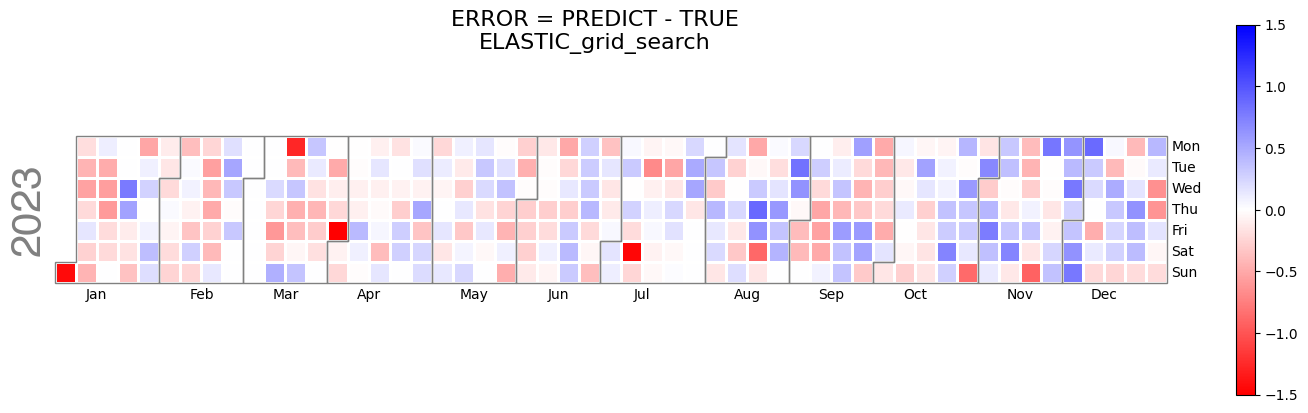

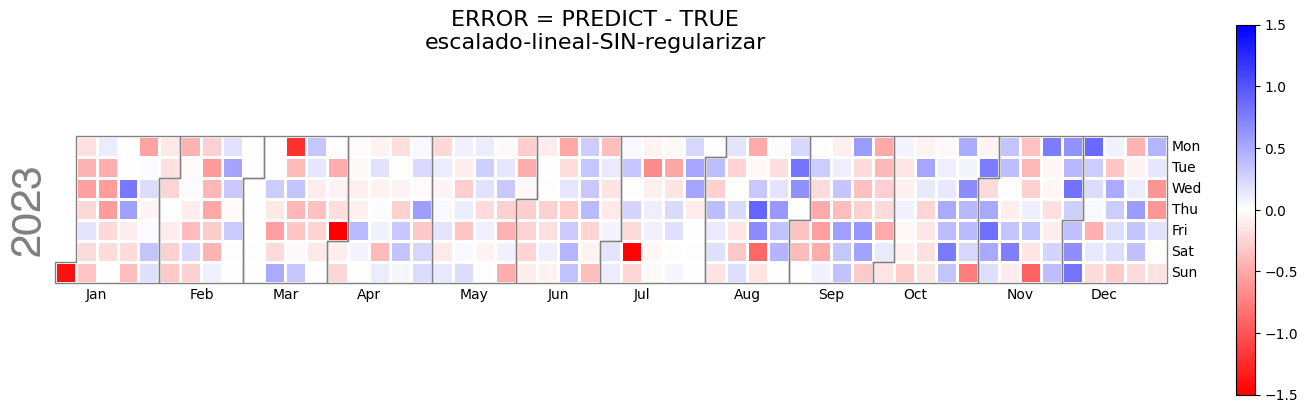

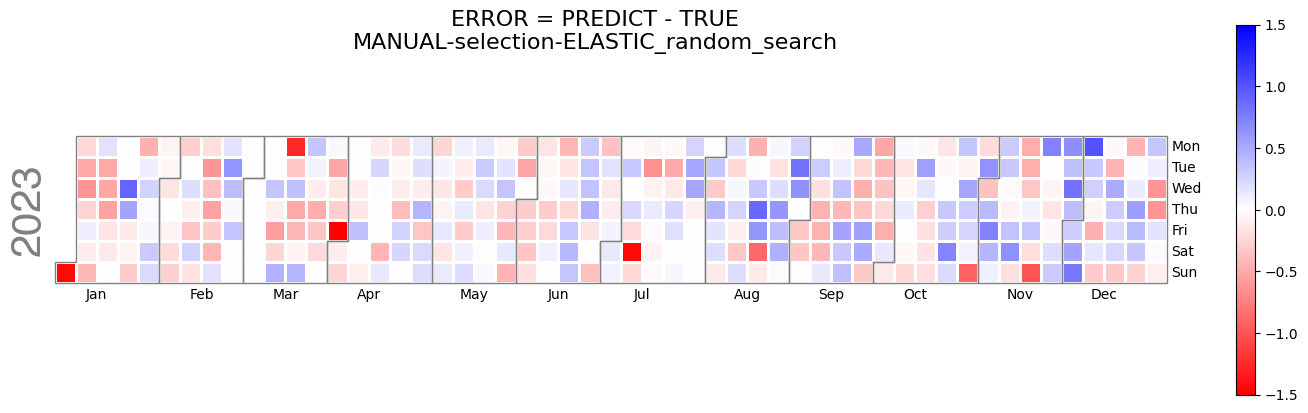

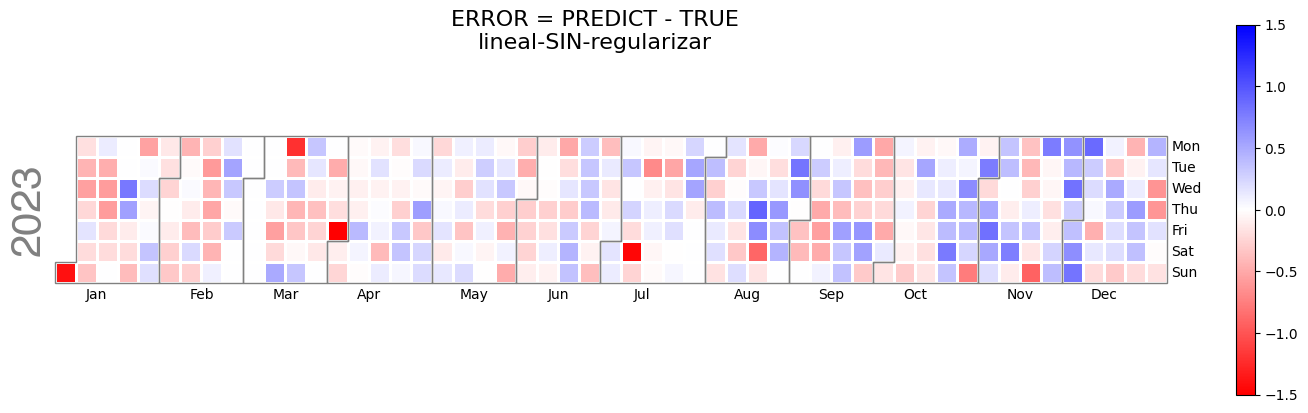

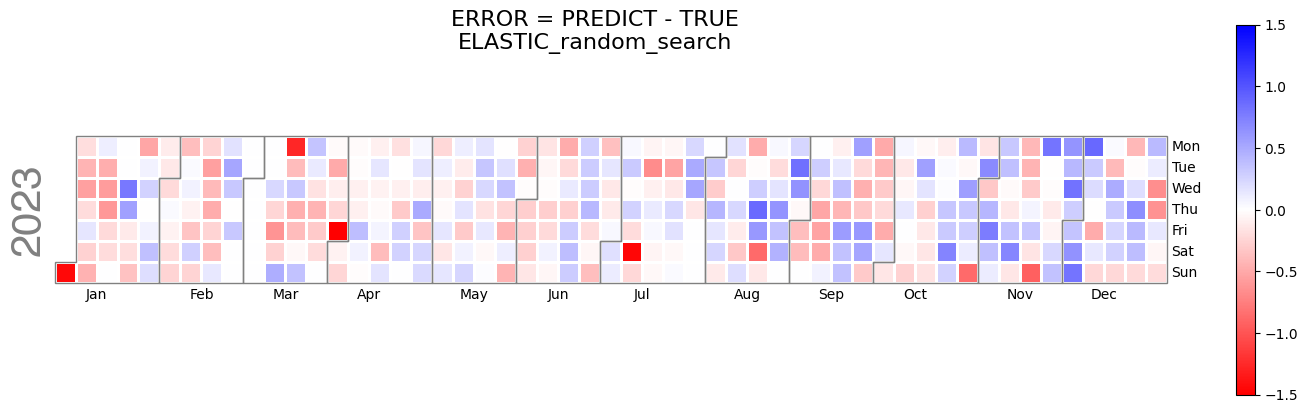

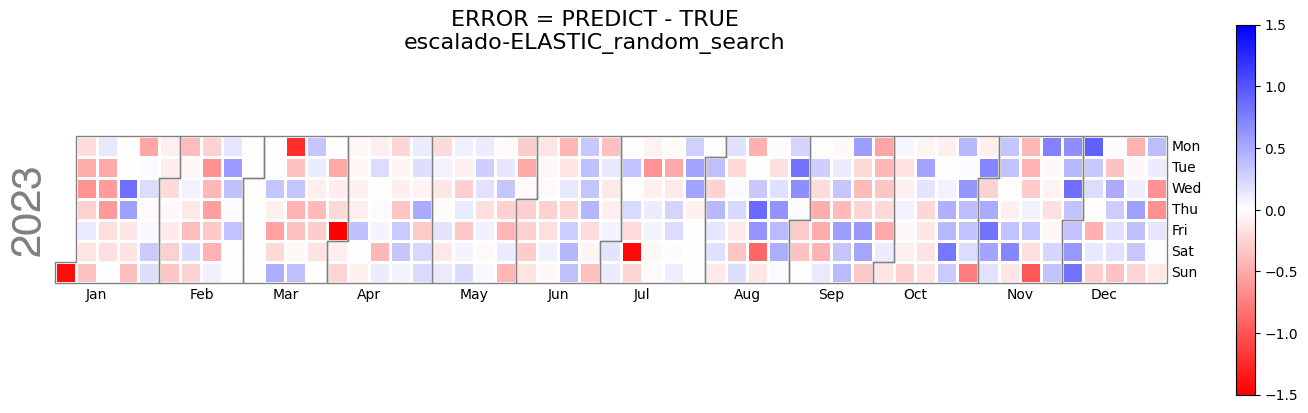

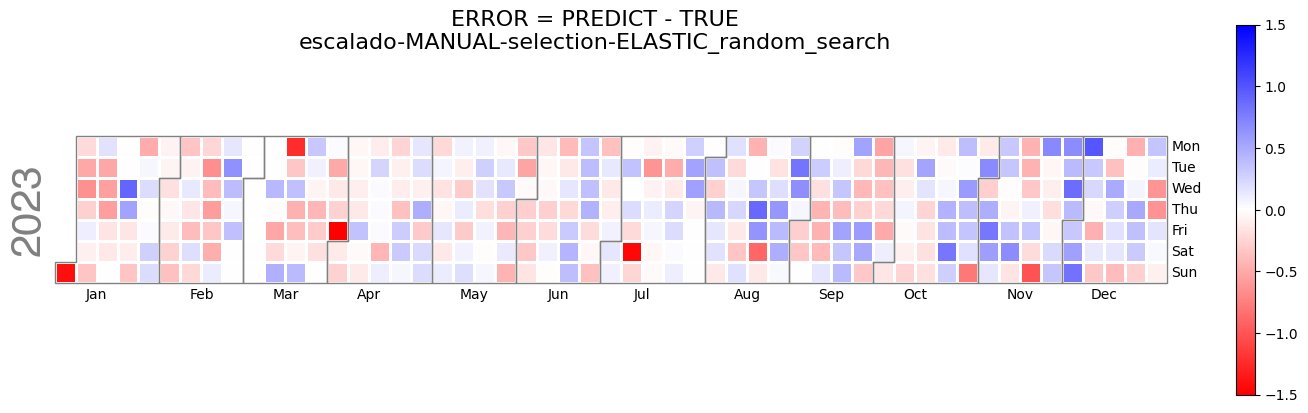

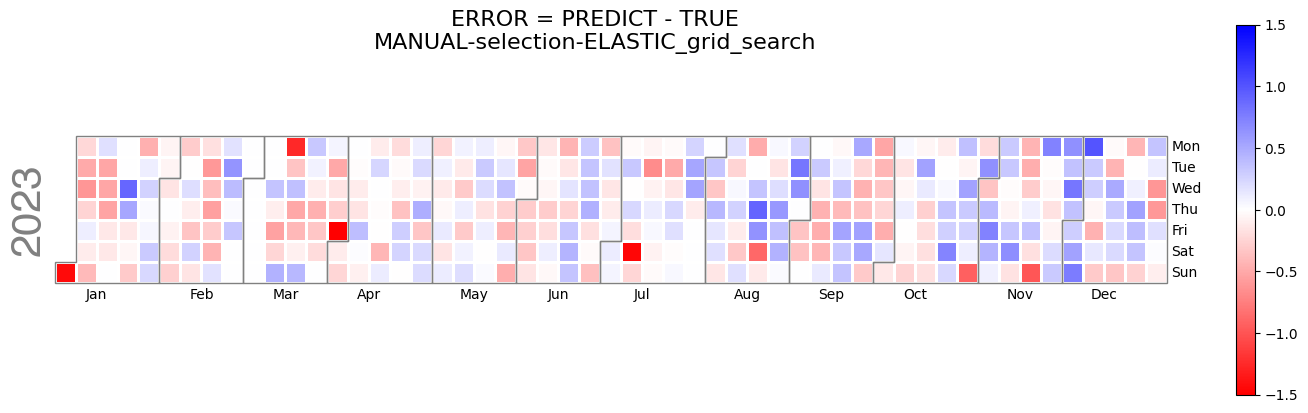

In [32]:

for i,m in enumerate(best_models):
    flo = MLFlow()
    # cargamos el modelo
    model = flo.get_saved_model(m)
    # pasamos numpy a Series
    y_pred = model.predict(to_model_input(X_train, X_test, m))
    
    diff = y_pred - y_test
    # para los colores https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
    cvals  = [-2.5, 0, 2.5]
    colors = ['red', '1', 'blue']
    
    norm=plt.Normalize(min(cvals),max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    plot_calendar(X_test, diff, 'ERROR = PREDICT - TRUE\n' + m, cmap, vmin=-1.5, vmax=1.5)


En general, podemos decir que los modelos tienden a sobreestimar las olas en la epoca de otoño - invierno (agosto-diciembre). Esto realmente se podría explicar con que la cantidad de olas de menor altura es mucho mayor que la cantidad de olas de mayor altura.


Además, hay muchos puntos rojos, indicando subestimación, algo muy importante pues no podemos poner en riesgo la salud de nuestros clientes, sobre todos niños pequeños, cuyos tutores legales podrían pensar que se trata de unas condiciones de calma, cuando realmente son olas peligrosas. Esto ocurre en ENERO sobre todo, donde, como vimos anteriormente, hay bastantes olas de gran altura.